In [1]:
import pandas as pd

cab = pd.read_csv("/Users/vedantpramodwagh/Documents/Data Glacier/Cab_Data.csv")
city = pd.read_csv("/Users/vedantpramodwagh/Documents/Data Glacier/City.csv")
customer = pd.read_csv("/Users/vedantpramodwagh/Documents/Data Glacier/Customer_ID.csv")
transaction = pd.read_csv("/Users/vedantpramodwagh/Documents/Data Glacier/Transaction_ID.csv")

In [2]:
# Data PreProcessing

if cab['Date of Travel'].dtype == 'int64':
    cab['Date of Travel']=pd.to_datetime(cab['Date of Travel']-25569, unit='d',origin='1899-12-30')
else:
    print('Cnoversion not needed or check data type')
        

In [4]:
cab['Date of Travel'].dtypes

#group data by year and month to see the transactions

a = cab['Date of Travel'].dt.year
b = cab['Date of Travel'].dt.month
b


0          1
1          1
2         12
3          1
4          1
          ..
359387     1
359388     1
359389     1
359390     1
359391     1
Name: Date of Travel, Length: 359392, dtype: int64

In [5]:
cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1946-01-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,1946-01-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,1945-12-31,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,1946-01-05,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,1946-01-01,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,1948-01-07,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,1948-01-03,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,1948-01-04,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,1948-01-04,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [6]:
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [7]:
transaction

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [8]:
# Merging the transaction the data with customer
a = pd.merge(transaction,customer,on='Customer ID',how='left')
a


,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10000012,27703,Card,Male,27,9237
2,10000013,28712,Cash,Male,53,11242
3,10000014,28020,Cash,Male,23,23327
4,10000015,27182,Card,Male,33,8536
...,...,...,...,...,...,...
440093,10440104,53286,Cash,Male,32,6528
440094,10440105,52265,Cash,Male,56,7966
440095,10440106,52175,Card,Male,32,6423
440096,10440107,52917,Card,Male,20,11284


In [9]:
# Merging the above data with cab data
b = pd.merge(a,cab,on='Transaction ID',how='left')
b

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,Male,28,10813,1946-01-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,27703,Card,Male,27,9237,1946-01-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,28712,Cash,Male,53,11242,1945-12-31,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,28020,Cash,Male,23,23327,1946-01-05,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,27182,Card,Male,33,8536,1946-01-01,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10440104,53286,Cash,Male,32,6528,1948-01-03,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
440094,10440105,52265,Cash,Male,56,7966,1948-01-04,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
440095,10440106,52175,Card,Male,32,6423,1948-01-04,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
440096,10440107,52917,Card,Male,20,11284,1948-01-01,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [10]:
# Merge the above the data with city
c = pd.merge(b,city,left_on='City',right_on='City',how='left')
c

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,1946-01-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,10000012,27703,Card,Male,27,9237,1946-01-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
2,10000013,28712,Cash,Male,53,11242,1945-12-31,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701"
3,10000014,28020,Cash,Male,23,23327,1946-01-05,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701"
4,10000015,27182,Card,Male,33,8536,1946-01-01,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10440104,53286,Cash,Male,32,6528,1948-01-03,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001"
440094,10440105,52265,Cash,Male,56,7966,1948-01-04,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001"
440095,10440106,52175,Card,Male,32,6423,1948-01-04,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001"
440096,10440107,52917,Card,Male,20,11284,1948-01-01,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,"418,859","127,001"


In [11]:
#Clean the data
#check the missing the data
c.isna().sum()


Transaction ID            0
Customer ID               0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
Date of Travel        80706
Company               80706
City                  80706
KM Travelled          80706
Price Charged         80706
Cost of Trip          80706
Population            80706
Users                 80706
dtype: int64

In [12]:
#Check the duplicates
c.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
440093    False
440094    False
440095    False
440096    False
440097    False
Length: 440098, dtype: bool

In [13]:
#handle the missing the values by mean

c.fillna(c.mean(),inplace = True)

/var/folders/_4/7_nyz1fs58v7y9k0_6bc3prc0000gn/T/ipykernel_54818/724386124.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  c.fillna(c.mean(),inplace = True)
/var/folders/_4/7_nyz1fs58v7y9k0_6bc3prc0000gn/T/ipykernel_54818/724386124.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  c.fillna(c.mean(),inplace = True)


In [16]:
#Outlier detection

Q1 = c.quantile(0.025)
Q3 = c.quantile(0.75)
IQR = Q3 - Q1
IQR

#Filter the outlier data
d = c.drop(['Date of Travel'],axis=1)
c1= d[~((d < (Q1 - 1.5 * IQR)) | (d > (Q3 + 1.5 * IQR))).any(axis=1)]
c1


/var/folders/_4/7_nyz1fs58v7y9k0_6bc3prc0000gn/T/ipykernel_54818/3773161959.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = c.quantile(0.025)
/var/folders/_4/7_nyz1fs58v7y9k0_6bc3prc0000gn/T/ipykernel_54818/3773161959.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = c.quantile(0.75)
/var/folders/_4/7_nyz1fs58v7y9k0_6bc3prc0000gn/T/ipykernel_54818/3773161959.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  c1= d[~((d < (Q1 - 1.5 * IQR)) | (d > (Q3 +

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,Pink Cab,ATLANTA GA,30.450000,370.950000,313.635000,"814,885","24,701"
1,10000012,27703,Card,Male,27,9237,Pink Cab,ATLANTA GA,28.620000,358.520000,334.854000,"814,885","24,701"
2,10000013,28712,Cash,Male,53,11242,Pink Cab,ATLANTA GA,9.040000,125.200000,97.632000,"814,885","24,701"
3,10000014,28020,Cash,Male,23,23327,Pink Cab,ATLANTA GA,33.170000,377.400000,351.602000,"814,885","24,701"
4,10000015,27182,Card,Male,33,8536,Pink Cab,ATLANTA GA,8.730000,114.620000,97.776000,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10440104,53286,Cash,Male,32,6528,Yellow Cab,WASHINGTON DC,8.400000,113.750000,106.848000,"418,859","127,001"
440094,10440105,52265,Cash,Male,56,7966,Yellow Cab,WASHINGTON DC,27.750000,437.070000,349.650000,"418,859","127,001"
440095,10440106,52175,Card,Male,32,6423,Yellow Cab,WASHINGTON DC,8.800000,146.190000,114.048000,"418,859","127,001"
440096,10440107,52917,Card,Male,20,11284,Yellow Cab,WASHINGTON DC,12.760000,191.580000,177.619200,"418,859","127,001"


In [17]:
#EDA
#stastiscal analysis

c1.describe()


,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip
count,4.371830e+05,437183.000000,437183.000000,437183.000000,437183.000000,437183.000000,437183.000000
mean,1.022048e+07,23760.741353,35.361723,15091.109391,22.441551,417.003510,284.454470
std,1.270570e+05,21191.346930,12.584464,7987.756636,10.979537,235.648298,141.571965
min,1.000001e+07,1.000000,18.000000,2000.000000,1.900000,15.600000,19.000000
25%,1.011029e+07,3640.000000,25.000000,8390.000000,14.280000,245.190000,179.550000
50%,1.022070e+07,16229.000000,33.000000,14766.000000,22.567254,423.443311,286.190113
75%,1.033062e+07,43910.000000,42.000000,21084.000000,30.300000,528.640000,380.577600
max,1.044011e+07,60000.000000,65.000000,35000.000000,48.000000,1259.240000,691.200000


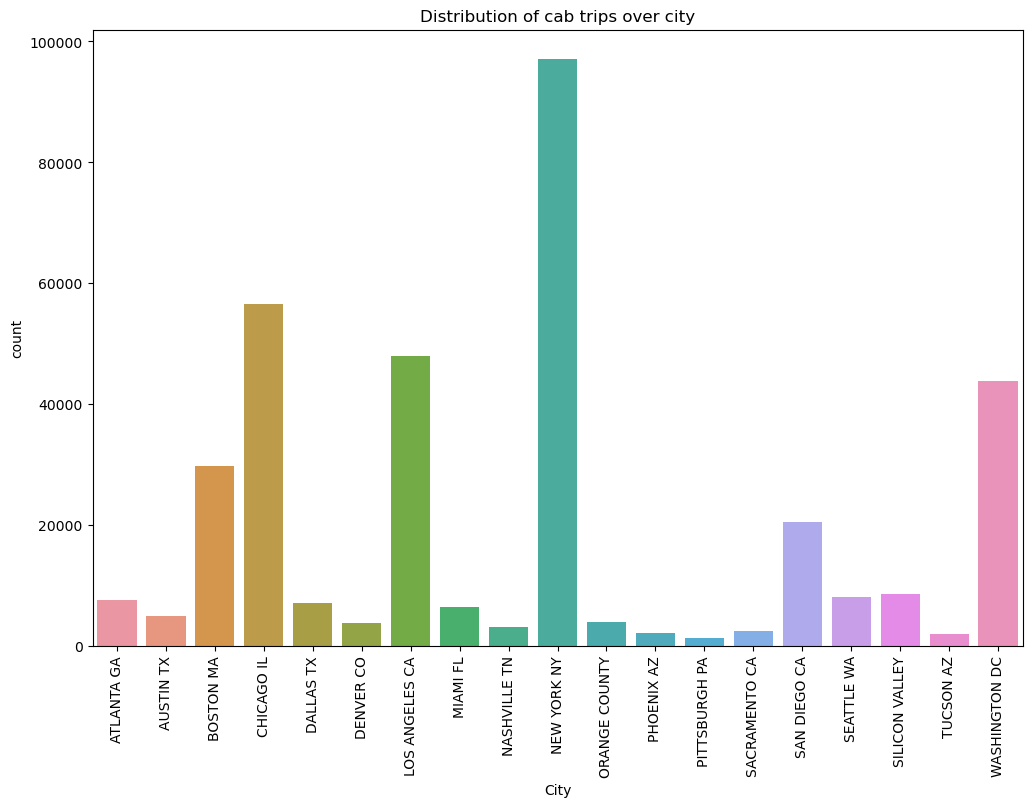

In [18]:
#visual insights
import matplotlib.pyplot as plt
import seaborn as sns

# Distrinution of cab trips over city

plt.figure(figsize=(12,8))
sns.countplot(data = c1,x='City')
plt.title('Distribution of cab trips over city')
plt.xticks(rotation=90)
plt.show()


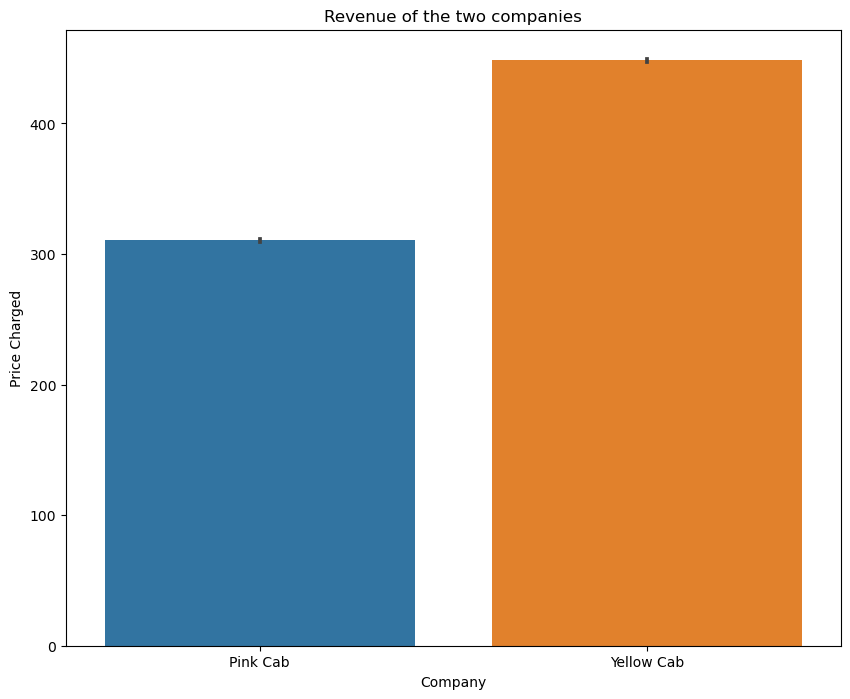

In [19]:
#Revenue of the two companies
plt.figure(figsize=(10,8))
sns.barplot(data=c1, x='Company',y='Price Charged')
plt.title('Revenue of the two companies')
plt.show()

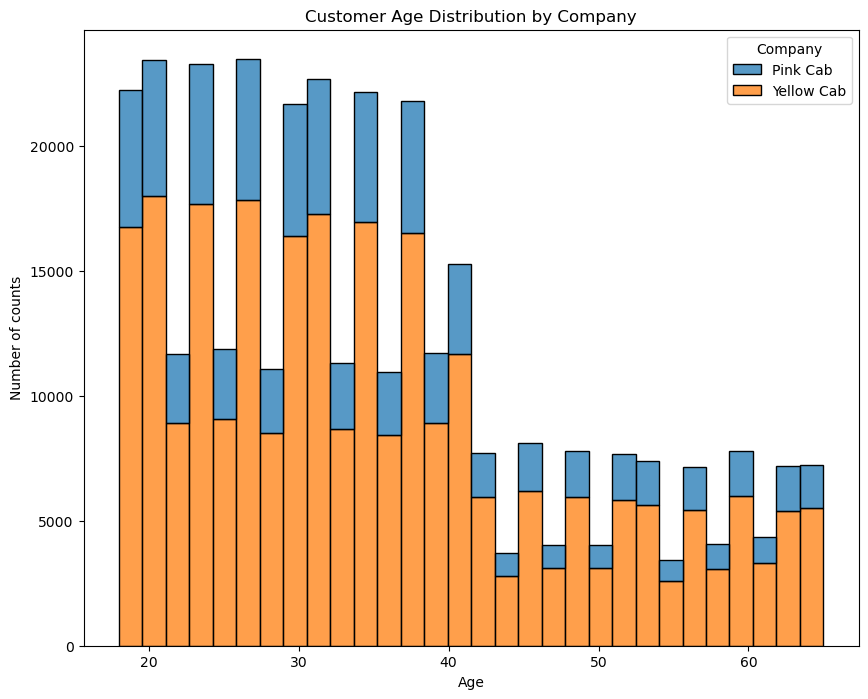

In [20]:
# Distribution of age
plt.figure(figsize=(10,8))
sns.histplot(data = c1, x='Age',hue='Company',bins=30,multiple='stack')
plt.title('Customer Age Distribution by Company')
plt.xlabel('Age')
plt.ylabel('Number of counts')
plt.show()

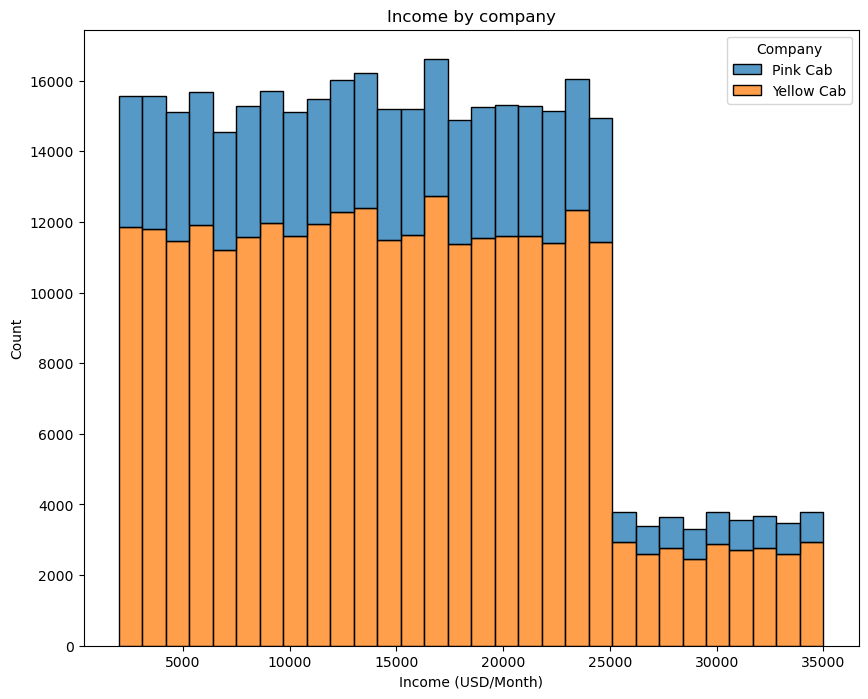

In [21]:
# distribuion by income 
plt.figure(figsize=(10,8))
sns.histplot(data =c1, x='Income (USD/Month)',hue='Company',multiple='stack',bins=30)
plt.title('Income by company')
plt.show()

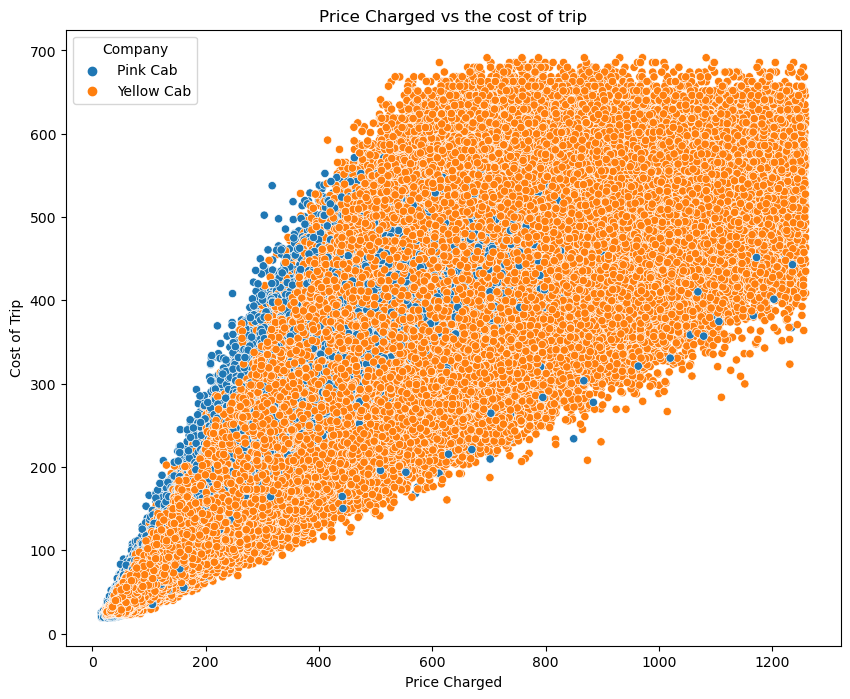

In [22]:
#Price charged vs the cost of trip
plt.figure(figsize=(10,8))
sns.scatterplot(data=c1,x='Price Charged',y='Cost of Trip',hue='Company')
plt.title('Price Charged vs the cost of trip')
plt.xlabel('Price Charged')
plt.ylabel('Cost of Trip')
plt.show()


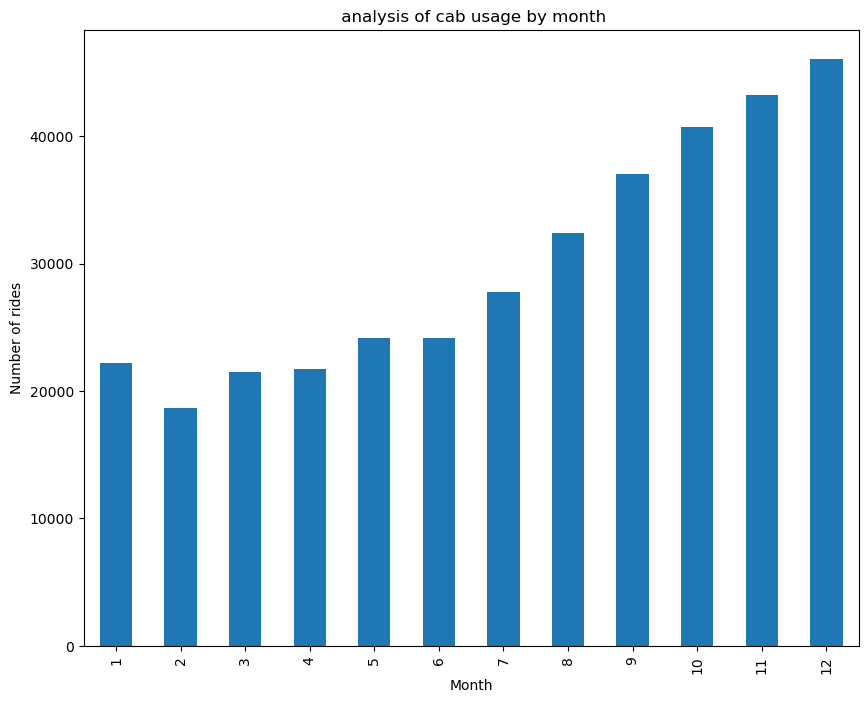

In [37]:
# Hypothesis Testing

# Testing for seasonality

import matplotlib.pyplot as plt
cab['Month']= cab['Date of Travel'].dt.month


# analysis of cab usage by month

monthly= cab.groupby(cab['Month']).size()

plt.figure(figsize=(10,8))
monthly.plot(kind='bar')
plt.title(' analysis of cab usage by month')
plt.xlabel('Month')
plt.ylabel('Number of rides')
plt.show()

In [51]:
#Hypothesis : Customer Age Impact on Cab Usage
#Null Hypothesis (H0): Customer age does not affect the frequency of cab usage.
#Alternative Hypothesis (H1): Younger customers use cabs more frequently than older customers.

from scipy.stats import ttest_ind

c1
#Splitting the customer age into median, younger, older

median_age = c1['Age'].median()
younger_age = c1[c1['Age'] <= median_age]
older_age = c1[c1['Age'] >= median_age]

# conduting the t test

t_stat, p_val = ttest_ind(younger_age['Transaction ID'],older_age['Transaction ID'])

print(f"T-statistic: {t_stat}, p-value: {p_val}")


if p_val < 0.05:
    print("Reject the null hypothesis")
else:
    print(" fail to reject null hypothesis")

T-statistic: -0.0568478088108412, p-value: 0.9546664547572243
 fail to reject null hypothesis


<Axes: title={'center': 'Monthly Usage by Company'}, xlabel='Month'>

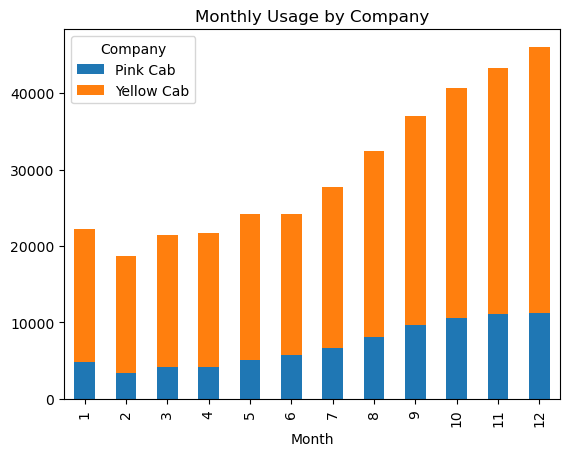

In [55]:
#Hypothesis: Company Dominance
# Group data by time period

company_usage = cab.groupby(['Month','Company'])['Transaction ID'].count().unstack()

company_usage.plot(kind='bar',stacked=True,title='Monthly Usage by Company')


#Hypothesis: Company Dominance


/var/folders/_4/7_nyz1fs58v7y9k0_6bc3prc0000gn/T/ipykernel_54818/3356467031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['Margin'] = c1['Price Charged'] - c1['Cost of Trip']


<Axes: xlabel='Transaction ID', ylabel='Margin'>

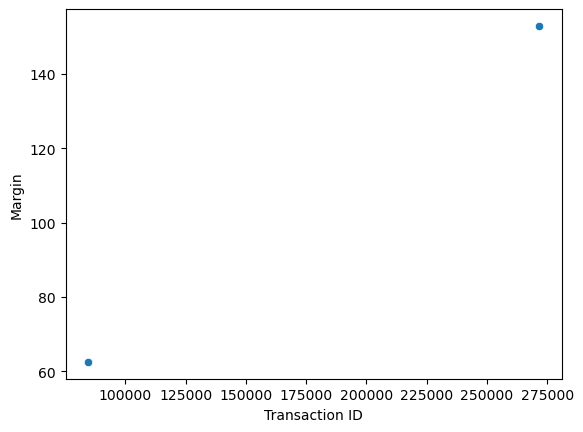

In [57]:
#Hypothesis: Company Dominance
# Calculate margin first
c1['Margin'] = c1['Price Charged'] - c1['Cost of Trip']
# Aggregate data by number of customers
customer_count_margin = c1.groupby('Company').agg({'Transaction ID': 'count', 'Margin': 'mean'})
sns.scatterplot(data=customer_count_margin, x='Transaction ID', y='Margin')

<Axes: title={'center': 'Usage by Age Groups'}, xlabel='Age'>

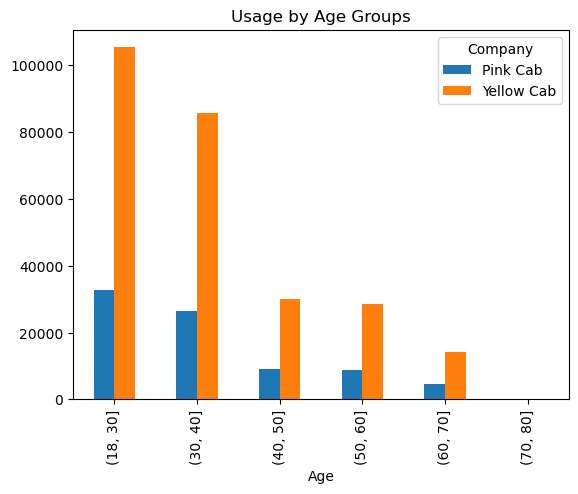

In [58]:
#Hypothesis: Customer Segment Attributes

# Analyze by demographic (e.g., Age and Income)
age_income_usage = c1.groupby(['Company', pd.cut(c1['Age'], bins=[18, 30, 40, 50, 60, 70, 80])])['Transaction ID'].count().unstack(0)
age_income_usage.plot(kind='bar', title='Usage by Age Groups')
